# Data 602 Project 2

## Abstract

Using a CDC dataset containing 2019 US birth data, this project aimed to determine if there were any hidden clusters in the data, based upon demographics, prenatal characteristics, and post-natal outcomes. After initial cleaning, the dataset contained 22897669 rows and 87 Columns for a final file size of 561KB. 
Ultimately I identified <b>2 clusters, some of which overlap </b> in the data. Upon closer analysis of the differences between those clusters, I found that parental age, prior births, birth weight, maternal BMI,and parental education were among the features that most varied among groups. These data can be used to now target those populations most at risk of a negative outcome, for example, the cluster with the highest parental ages also had higher APGAR5 scores, indicating poorer health indicators for the infant after birth.

EDIT: Additional exploratory analysis led to tweaks to the model which resulted in 39 clusters. I also found that APGAR5 Scores did not vary significantly among these clusters meaning that it is not a good metric for identifying outome in these groups. The greatest variance between groups was among the parental age, interval since last birth, birth weight, and maternal race. Upon revision of the project, the data produced a lot more clusters, which made for a more complicated story to interpret as well. This will require a significant amount additional analysis to interpret, and I have not been able to identify groups for intervention at this point. Despite this, the dataset is an optimal source for investigating these types of quesions.

## Introduction

Using a CDC dataset containing 2019 US birth data, this project aimed to fit a clustering model to identify hidden groups within the data that could benefit from intervention to prevent maternal or infant mortality and morbidity.

Due to the runtimes involved I chose to use a subset of the data for the majority of data exploration so that the functions would run quickly. I used 1% or about 29k rows, selected via random sample, for this purpose.

The analysis consisted of testing a KMeans algorithm before applying a DBSCAN algorithm in an attempt to find clusters in the data. I was ultimately unable to identify clusters within the data, despite attempting PCA to reduce dimensionality. I believe this is likely due to the complexity of the dataset and would recommend additional investigation using this data, particularly when additional computational resources are available. 

#### Research Questions/ Business Problem:

The research problem posed in this project is based upon infant and maternal outcomes. Hypothetical uses for this analysis would be to target particular populations for additional car in Obstetric care, based upon hidden clusters identified based on outcome metrics and population demographics from CDC natality data. The specific questions to be addressed are:

1. Using U.S,. Natality data, specifically health metrics and pregnancy outcomes, can we identify hidden groups based on demographic characteristics that would benefit from additional care or consideration during the prenatal period?
2. By examining parental demographics and health metrics, are there hiden groups that have better or poorer natality outcomes? Using PCA can we identify the features that most contribute to this variation?

Stakeholders in this endeavor would include the CDC and national health policy makers as well as hospital administrators and potentially even medical practitioners.
The overall business goal of this project would be to reduce incidences of maternal and/or infant morbidity and mortality by identifying upstream population targets for intervention that can improve outcomes. 

The data being used to address this question has high dimensionallity and is very complicated, with multiple categorical and numeric features. This presents a problem that is suited for a Clustering Machine learning algorithm, which can identify patterns in multidimensional space that we would not otherwise be able to access.

## Data Used

The raw data was acquired from the CDC public data files available here: https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

This data is collected from both the mother, the Facility where birth occurred, and certificates of birth (see documentation).

##### Data Dictionary:
The files used for this project included data from 2019 and documentation for the file can be found here: ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/UserGuide2019-508.pdf

##### Data Description:
The original data file was a text file containing 5gb of data, consisting of 3757582 rows of data and 228 columns. After dropping rows with missing data and duplicates, as well as unneeded columns containing duplicate data (such as multiple recodes), data flags, and imputation flags (flags for were data was imputed which is not needed in this analysis) the final dataset contained 2897669 rows and 87 columns for a final file size of 561KB. 

## Motivation

The motivation for this project comes from the increasing amount of reasearch showing that US Maternal and infant mortality and morbidity is higher in the US than in other similarly developed countries (Chen, et al., 2016; Singh & Stella, 2019). This trend inspired me to look for data that could be used to investigate how demographic and prenatal characteristics are distributed when examining clusters in pregnancy outcomes. This led me to the Birth Data Files from the CDC.

## Proposed Method

Once the data has been cleaned I propose to prepare the data for modeling using encoding and scaling. Because the data is heterogenious, I will use the labelencoder and onehotencoder functions from sklearn on the categorical variables based on their type (labelencoder for ordered and binary categorical data and onehotencoder for the unordered categorical data)

I am going to start with a KMeans to see if the data have any obvious clusters, but I think the best algoithm for this will be the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm. DBSCAN uses a threshold epsilon to indicate the neighbors that are considered part of the cluster. DBSCAN corepoints (the center of the cluster) is determined by the least min_sample points (min_sample being the minimum number of neighbors required to be considered a corepoint).

The reason I am focusing on DBSCAN is multimodal:
1. The nature of the data I am using is very large, and the DBSCAN model is capable of handling large datasets efficiently
2. DBSCAN handles noise, and this dataset contains a lot of noise and overlapping groups
3. DBSCAN is able to handle oddly shaped clusters, while other methods, like KMeans, are limited to circular clusters.

Drawbacks of the DBSCAN model are that if the clusters have differing densities, they are not detected well. 

### Data Cleaning

Find the Data Acquisition notebook here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Initial%20Data%20Cleaning%20Updated%2010_18.ipynb'>Data Acquisition Notebook</a>

Find the Data Cleaning notebook here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Initial%20Data%20Cleaning%20Updated%2010_18.ipynb'>Data Cleaning Notebook</a>

### Exploratory Data Analysis and Modeling
Detailed exploratory analysis here: <a href = 'https://github.com/Jcc329/Select-the-best-Wine-Predicting-wine-quality/blob/main/Jupyter%20Notebooks/Project%201%20Exploratory%20Analysis%20Updated.ipynb'>Exploratory Analysis Notebook</a>

For a brief review of the data exploration, including demonstrations of the models attempted, scroll down.

### Limitations and Furture Research

One of the primary limitations I experienced working with this data was that my computing system had a lot of difficulty dealing with the large amount of data provided in this data source. Ultimately, I ended up sampling the data in order to perform the analysis in a reasonable amount of time without interfering with the daily use of my laptop for work. I also chose to include only the ordered categorical and numeric data in this analysis in an attempt to limit features and scope of the analysis and the computational requirements. 

Future analyses should expand upon my investigation with improved or expanded computational power and resources, in order to incorporate the entire dataset. Furthermore, it would be interesting to use this dataset for predictive machine learning models, in order to investigate which demographic or situational features are most predictive of adverse outcomes. 

### References and Contributions

Chen, A., Oster, E., & Williams, H. (2016). Why is infant mortality higher in the United States than in Europe?. American Economic Journal: Economic Policy, 8(2), 89-124.

Singh, G. K., & Stella, M. Y. (2019). Infant mortality in the United States, 1915-2017: large social inequalities have persisted for over a century. International Journal of Maternal and Child Health and AIDS, 8(1), 19.

I used information from 
https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html, 
https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/#:~:text=Two%20important%20parameters%20are%20required,neighbors%20within%20%E2%80%9Ceps%E2%80%9D%20radius and 
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc to help me decide on the algorithm to use and to understand the rationale for the DBSCAN model.

I also used the following blogs, guides, and resources to help me put together the project:
https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
https://medium.com/@shritam/how-dbscan-algorithm-works-2b5bef80fb3

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #for visualizations
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder #encoder for binary and ordered categorical data
from sklearn.preprocessing import OneHotEncoder #encoder for unordered categorical data
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import time
start_time = time.time()

C:\Users\15856\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df1 = pd.read_csv('./NatalityData_cleaned_1.zip', compression = 'zip', low_memory = False)
df2 = pd.read_csv('./NatalityData_cleaned_2.zip', compression = 'zip', low_memory = False)
df3 = pd.read_csv('./NatalityData_cleaned_3.zip', compression = 'zip', low_memory = False)
df4 = pd.read_csv('./NatalityData_cleaned_4.zip', compression = 'zip', low_memory = False)


df= df1.append(df2)
df= df.append(df3)
df= df.append(df4)
df.head()

,Unnamed: 0,Birth Place,Maternal Age,Maternal Nativity,Maternal Residence Status,Maternal Race,Maternal Hispanic Origin,Paternity Acknowledged,Marital Status,Maternal Education,...,Gastroschisis,Limb Reduction Defect,Cleft lip,Cleft Palate,Down Syndrome,Suspected Chromosomal Disorder,Hypospadias,Infant Transferred,Infant Living,Infant Breastfed
0,1,1,40,2,1,10,0,X,1.0,7,...,N,N,N,N,N,N,N,N,Y,Y
1,2,1,30,1,1,3,0,X,1.0,5,...,N,N,N,N,N,N,N,N,Y,Y
2,3,1,25,1,1,1,0,X,1.0,6,...,N,N,N,N,N,N,N,N,Y,Y
3,5,1,30,1,1,6,0,Y,2.0,6,...,N,N,N,N,N,N,N,N,Y,Y
4,6,1,33,1,2,1,0,X,1.0,6,...,N,N,N,N,N,N,N,N,Y,Y


In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
#I Started by identifying all the variables in my dataset and splitting them by their type
Binary_Categoricals = ['Maternal Nativity','Paternity Acknowledged', 'WIC','Pre-pregnancy Diabetes', 
                      'Gestational Diabetes', 'Pre-pregnancy Hypertension', 'Gestational Hypertension',
                      'Hypertension Eclampsia', 'Previous Preterm Birth','Infertility treatment used', 'Fertility Enhancing Drugs', 
                      'Asst. Reproductive Tech', 'Gonorrhea', 'Syphilis', 'Chlamydia', 'Hep B', 'Hep C',
                      'Successful External Cephalic Version', 'Failed Cephalic Version','Induced Labor', 'Augmented Labor', 
                      'Steroids', 'Antibiotics', 'Chorioamnionitis', 'Anesthesia','If Cesarean, Labor Attempted',
                      'Maternal Transfusion', 'Perineal Laceration', 'Ruptured Uterus', 'Unplanned Hysterectomy',
                      'Maternal admit to ICU', 'Mother Transferred','infant sex','Assisted Ventilation immediately',
                      'Assisted ventilation >6hr', 'Admission to NICU', 'Surffactant', 'Antibiotis for Newborn', 'Seizures',
                      'Anencephaly', 'Spina Bifida', 'Cyanotic Congenital Heart Disease', 'Congenital Diaphragmatic Hernia',
                      'Omphalocele', 'Gastroschisis', 'Limb Reduction Defect', 'Cleft lip', 'Cleft Palate',  'Hypospadias', 'Infant Transferred', 'Infant Living', 'Infant Breastfed']
Ordered_Categoricals = ['Maternal Education','Paternal Education','Month prenatal care Began']
Unordered_Categoricals = ['Birth Place','Marital Status','Maternal Residence Status','Maternal Race','Maternal Hispanic Origin', 
                         'Paternal Race', 'Paternal Hispanic Origin', 'Fetal Presentation at Delivery','Delivery Method',
                         'Attendant at Birth','Payment Source','Down Syndrome', 'Suspected Chromosomal Disorder']
Numeric = ['Maternal Age','Paternal Age','Prior births, now living', 'Prior births, now dead', 'Prior terminations',
          'Interval since last Live Birth (Mo)', 'Number of Prenatal Visits','Daily Cigarette use before Pregnancy', 
           'Daily Cigarette use, 1st Trimester','Daily Cigarette use, 2nd Trimester', 'Daily Cigarette use, 3rd Trimester',
          'BMI', 'Weight Gain', 'Number of Previous Cesareans','5 Minute APGAR', '10 Minute APGAR', 'Plurality (Number of Babies)',
          'Gestation Duration (wks)', 'Birth Weight (g)']

## Brief Exploratory Analysis

The plan for my exploratory analysis was:
- to examine each feature and it's characteristics
- to visualize the correlation matrix for the data to explore any related attributes.
- drop unneccessary features based on the correlation matrix
- to perform encoding on the necessary categorical attributes
- to scale all attributes used in the model
- the Kmeans and DBSPAN algorithms to find clusters in the data
- if necessary, to apply pca for feature selection

In [5]:
#Examine Data:
df.describe()

,Birth Place,Maternal Age,Maternal Nativity,Maternal Residence Status,Maternal Race,Maternal Hispanic Origin,Marital Status,Maternal Education,Paternal Age,Paternal Race,...,Number of Previous Cesareans,Fetal Presentation at Delivery,Delivery Method,Attendant at Birth,Payment Source,5 Minute APGAR,10 Minute APGAR,Plurality (Number of Babies),Gestation Duration (wks),Birth Weight (g)
count,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,...,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06,2.564260e+06
mean,1.029725e+00,2.925799e+01,1.212398e+00,1.370144e+00,1.837466e+00,5.374252e-01,1.326995e+00,4.538226e+00,3.162875e+01,8.612655e+00,...,2.140547e-01,1.052827e+00,1.774257e+00,1.344896e+00,1.855477e+00,8.813786e+00,8.732607e+01,1.026563e+00,3.870256e+01,3.295671e+03
std,2.602634e-01,5.620836e+00,4.090052e-01,5.507251e-01,2.566961e+00,1.379602e+00,4.691153e-01,1.733003e+00,6.736811e+00,2.488565e+01,...,5.740473e-01,2.556338e-01,1.149688e+00,7.660254e-01,1.162482e+00,6.936763e-01,7.369414e+00,1.653491e-01,2.176395e+00,5.432656e+02
min,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.500000e+02
25%,1.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.700000e+01,1.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,8.800000e+01,1.000000e+00,3.800000e+01,2.995000e+03
50%,1.000000e+00,2.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,3.100000e+01,1.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,8.800000e+01,1.000000e+00,3.900000e+01,3.317000e+03
75%,1.000000e+00,3.300000e+01,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,3.600000e+01,2.000000e+00,...,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,8.800000e+01,1.000000e+00,4.000000e+01,3.640000e+03
max,7.000000e+00,5.000000e+01,2.000000e+00,4.000000e+00,1.500000e+01,9.000000e+00,2.000000e+00,8.000000e+00,9.800000e+01,9.900000e+01,...,1.200000e+01,3.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,8.800000e+01,5.000000e+00,4.700000e+01,8.160000e+03


In [6]:
df.describe(include = object)

,Paternity Acknowledged,WIC,Pre-pregnancy Diabetes,Gestational Diabetes,Pre-pregnancy Hypertension,Gestational Hypertension,Hypertension Eclampsia,Previous Preterm Birth,Infertility treatment used,Fertility Enhancing Drugs,...,Gastroschisis,Limb Reduction Defect,Cleft lip,Cleft Palate,Down Syndrome,Suspected Chromosomal Disorder,Hypospadias,Infant Transferred,Infant Living,Infant Breastfed
count,2564260,2564260,2564260,2564260,2564260,2564260,2564260,2564260,2564260,2564260,...,2564260,2564260,2564260,2564260,2564260,2564260,2564260,2564260,2564260,2564260
unique,3,2,2,2,2,2,2,2,2,3,...,2,2,2,2,3,3,2,2,2,2
top,X,N,N,N,N,N,N,N,N,X,...,N,N,N,N,N,N,N,N,Y,Y
freq,1725761,1806706,2539872,2383195,2508101,2360573,2557171,2472861,2512292,2512292,...,2563788,2563950,2563028,2563647,2562884,2563184,2562688,2540498,2563117,2187529


In [7]:
#https://datatofish.com/correlation-matrix-pandas/
corrMatrix = df[Numeric+Ordered_Categoricals].corr()
corrMatrix

,Maternal Age,Paternal Age,"Prior births, now living","Prior births, now dead",Prior terminations,Interval since last Live Birth (Mo),Number of Prenatal Visits,Daily Cigarette use before Pregnancy,"Daily Cigarette use, 1st Trimester","Daily Cigarette use, 2nd Trimester",...,Weight Gain,Number of Previous Cesareans,5 Minute APGAR,10 Minute APGAR,Plurality (Number of Babies),Gestation Duration (wks),Birth Weight (g),Maternal Education,Paternal Education,Month prenatal care Began
Maternal Age,1.000000,0.742961,0.317024,0.023642,0.176324,-0.260955,0.076356,-0.064467,-0.046485,-0.037085,...,-0.032181,0.152332,0.011400,0.004774,0.046313,-0.051283,0.041514,0.398882,0.316331,-0.019011
Paternal Age,0.742961,1.000000,0.260148,0.021472,0.136828,-0.221550,0.044453,-0.034659,-0.018142,-0.010087,...,-0.030735,0.123680,0.011006,0.004186,0.038391,-0.038865,0.026678,0.274357,0.250323,-0.008936
"Prior births, now living",0.317024,0.260148,1.000000,0.058212,0.180675,-0.688360,-0.095072,0.036369,0.057252,0.064825,...,-0.109317,0.281444,0.027913,0.009045,0.092996,-0.072662,0.029535,-0.197251,-0.136074,0.020914
"Prior births, now dead",0.023642,0.021472,0.058212,1.000000,0.040174,-0.060947,-0.002496,0.012838,0.014621,0.014799,...,-0.011331,0.039829,-0.004518,-0.001670,0.005173,-0.019735,-0.011635,-0.026450,-0.019930,0.003921
Prior terminations,0.176324,0.136828,0.180675,0.040174,1.000000,-0.138263,0.029044,0.056671,0.056842,0.053925,...,-0.010774,0.081219,-0.004989,-0.002684,0.020863,-0.043521,-0.019077,-0.019344,-0.014944,-0.002778
Interval since last Live Birth (Mo),-0.260955,-0.221550,-0.688360,-0.060947,-0.138263,1.000000,0.053407,-0.020923,-0.039529,-0.045948,...,0.114452,-0.293900,-0.048149,-0.021585,-0.107770,0.067648,-0.058627,0.096695,0.065014,-0.006110
Number of Prenatal Visits,0.076356,0.044453,-0.095072,-0.002496,0.029044,0.053407,1.000000,-0.024694,-0.037966,-0.041286,...,0.061512,-0.019722,0.017841,0.012227,0.023453,0.132656,0.116412,0.139681,0.096502,-0.104156
Daily Cigarette use before Pregnancy,-0.064467,-0.034659,0.036369,0.012838,0.056671,-0.020923,-0.024694,1.000000,0.795259,0.699805,...,0.021339,0.018054,-0.015447,-0.006874,0.000410,-0.015711,-0.057071,-0.146372,-0.111914,0.006678
"Daily Cigarette use, 1st Trimester",-0.046485,-0.018142,0.057252,0.014621,0.056842,-0.039529,-0.037966,0.795259,1.000000,0.875965,...,-0.002027,0.025321,-0.013698,-0.006258,0.000333,-0.020462,-0.065629,-0.135986,-0.101268,0.008719
"Daily Cigarette use, 2nd Trimester",-0.037085,-0.010087,0.064825,0.014799,0.053925,-0.045948,-0.041286,0.699805,0.875965,1.000000,...,-0.012499,0.027721,-0.012414,-0.005479,0.001026,-0.022066,-0.066855,-0.127527,-0.093412,0.008380


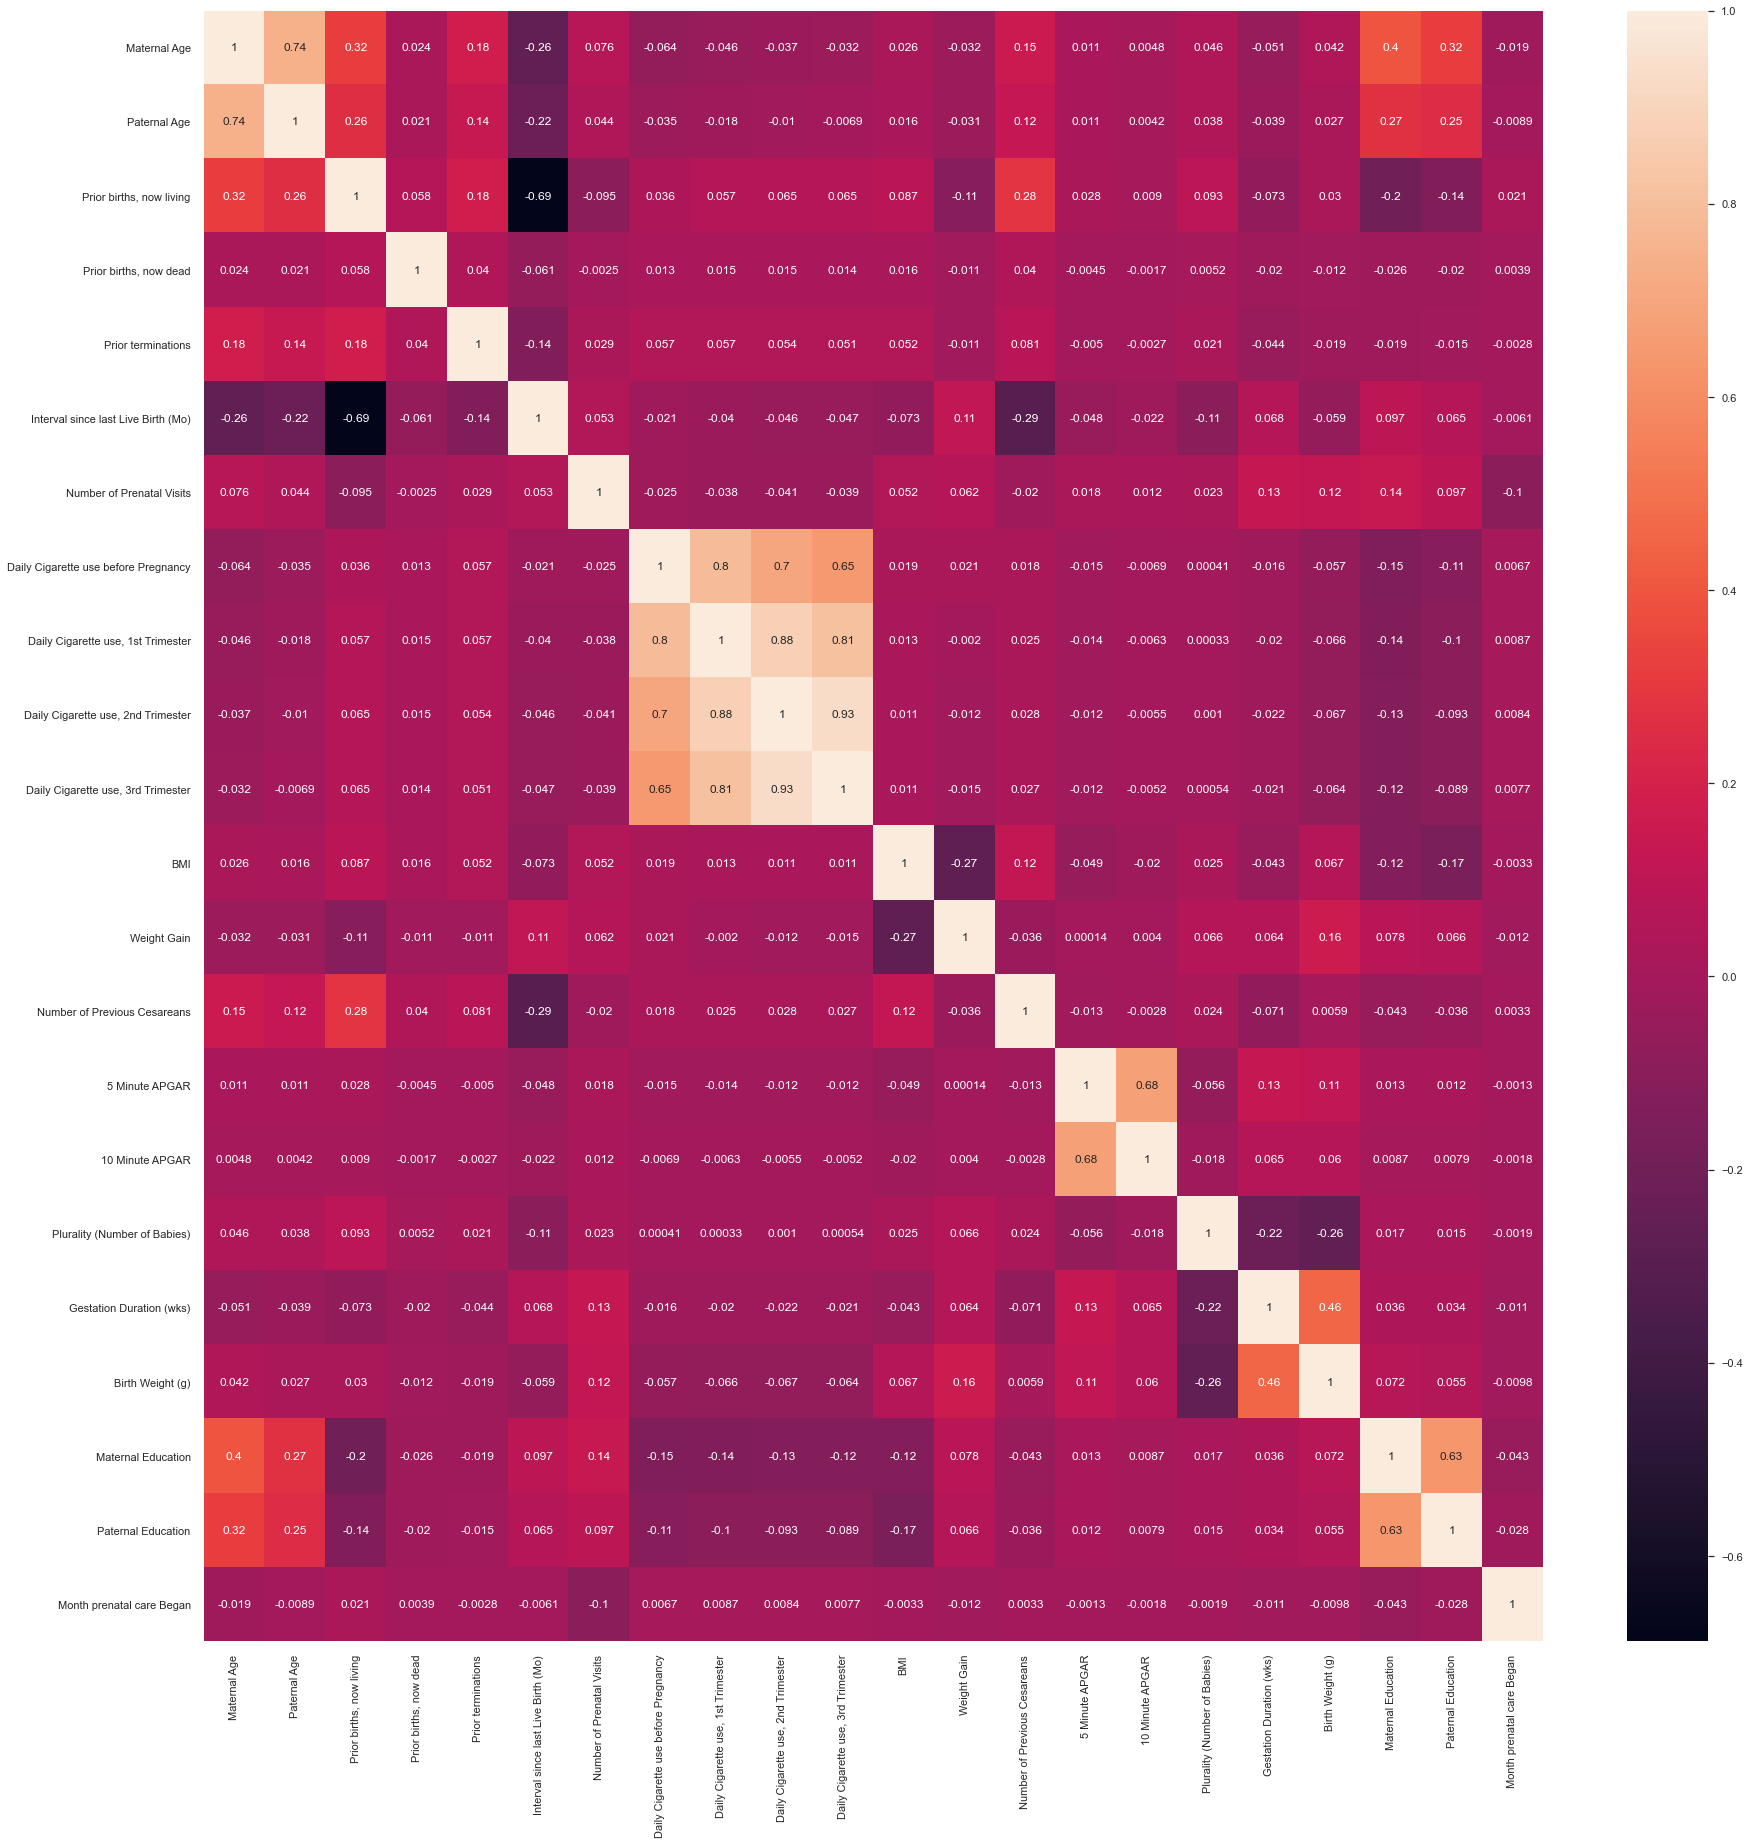

In [8]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

Based on the correlations identified in this matrix and later testing, I determined that I would drop several variables:  'Daily Cigarette use before Pregnancy','Daily Cigarette use, 1st Trimester',
            'Daily Cigarette use, 2nd Trimester','10 Minute APGAR'
            
Additional correlations found in the exploratory analysis included those between attendant at birth and birth place, maternal and paternal race, race and hispanic origin, and finally payment source and race. I will keep maternal race and birth place to reduce these correlated groups. 

In [9]:
dropVars = ['Daily Cigarette use before Pregnancy','Daily Cigarette use, 1st Trimester','Payment Source',
                         'Fetal Presentation at Delivery',
            'Daily Cigarette use, 2nd Trimester','10 Minute APGAR','Paternal Race', 'Paternal Hispanic Origin', 'Maternal Hispanic Origin', ]

df.drop(dropVars, axis =1, inplace = True)

In [10]:
#reset groups without dropped variables
Binary_Categoricals = ['Maternal Nativity','Paternity Acknowledged', 'WIC','Pre-pregnancy Diabetes', 
                      'Gestational Diabetes', 'Pre-pregnancy Hypertension', 'Gestational Hypertension',
                      'Hypertension Eclampsia', 'Previous Preterm Birth','Infertility treatment used', 'Fertility Enhancing Drugs', 
                      'Asst. Reproductive Tech', 'Gonorrhea', 'Syphilis', 'Chlamydia', 'Hep B', 'Hep C',
                      'Successful External Cephalic Version', 'Failed Cephalic Version','Induced Labor', 'Augmented Labor', 
                      'Steroids', 'Antibiotics', 'Chorioamnionitis', 'Anesthesia','If Cesarean, Labor Attempted',
                      'Maternal Transfusion', 'Perineal Laceration', 'Ruptured Uterus', 'Unplanned Hysterectomy',
                      'Maternal admit to ICU', 'Mother Transferred','infant sex','Assisted Ventilation immediately',
                      'Assisted ventilation >6hr', 'Admission to NICU', 'Surffactant', 'Antibiotis for Newborn', 'Seizures',
                      'Anencephaly', 'Spina Bifida', 'Cyanotic Congenital Heart Disease', 'Congenital Diaphragmatic Hernia',
                      'Omphalocele', 'Gastroschisis', 'Limb Reduction Defect', 'Cleft lip', 'Cleft Palate',  'Hypospadias', 'Infant Transferred', 'Infant Living', 'Infant Breastfed']
Ordered_Categoricals = ['Maternal Education','Paternal Education','Month prenatal care Began']
Unordered_Categoricals = ['Birth Place','Marital Status','Maternal Race','Delivery Method']
Numeric = ['Maternal Age','Paternal Age','Prior births, now living', 'Prior births, now dead', 'Prior terminations',
          'Interval since last Live Birth (Mo)', 'Number of Prenatal Visits', 'Daily Cigarette use, 3rd Trimester',
          'BMI', 'Weight Gain', 'Number of Previous Cesareans','5 Minute APGAR', 'Plurality (Number of Babies)',
          'Gestation Duration (wks)', 'Birth Weight (g)']


## Feature Engineering
- Encoding
- Scaling

Due to processing limitations, I tested methods using a subset of the dataframe first and in this notebook. A second notebook is uploaded run on the full dataset, however, this took an long time to complete.

In [11]:
df1 = df.sample(frac = 
               .02)
df1.reset_index(drop=True, inplace =True)
df2 = df1
df1 = df1[Numeric+Ordered_Categoricals+Unordered_Categoricals]


In [12]:
# Bring in function from .py file
%run Functions_HW2.py

In [13]:
ohedf = onehotencoder(df1, Unordered_Categoricals)
df1 = df1.join(ohedf)
df1.drop(Unordered_Categoricals,axis=1,inplace = True) #replacing the unordered categoricals with the encoded data

In [14]:
#In the first iteration of testing, I encoded the ordered and binary categorical data at this stage. However, I later
#decided not to use the binary data in the model (explained below) and have therfore left that out here. The entire 
#process can be found in the Exploratory Analysis Notebook
le = LabelEncoder()

for i in (Ordered_Categoricals):
    le.fit(df1[i])
    df1[i] = le.transform(df1[i])
df1.head()

,Maternal Age,Paternal Age,"Prior births, now living","Prior births, now dead",Prior terminations,Interval since last Live Birth (Mo),Number of Prenatal Visits,"Daily Cigarette use, 3rd Trimester",BMI,Weight Gain,...,Maternal Race_10,Maternal Race_11,Maternal Race_12,Maternal Race_13,Maternal Race_14,Maternal Race_15,Delivery Method_1,Delivery Method_2,Delivery Method_3,Delivery Method_4
0,34,35,0,0,0,888,13,0,28.3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,33,32,2,0,1,36,7,5,25.0,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,29,30,2,0,1,75,6,0,22.5,24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,33,38,1,0,0,75,14,0,23.4,29,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24,31,2,0,0,19,14,3,19.7,84,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
#Scale the data so that all features have equal weight in the model
scaler = MinMaxScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

## Modeling
I Started with a KMeans to see if the data have any obvious clusters, but based upon my research, the best algoithm for clustering this data will be the DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN uses a threshold epsilon to indicate the neighbors that are considered part of the cluster. DBSCAN corepoints (the center of the cluster) is determined by the least min_sample points (min_sample being the minimum number of neighbors required to be considered a corepoint).

The reasons DBSCAN is suited to this data:
1. The nature of the data I am using is very large, and the DBSCAN model is capable of handling large datasets efficiently
2. DBSCAN handles noise, and this dataset contains a lot of noise and overlapping groups
3. DBSCAN is able to handle oddly shaped clusters, while other methods, like KMeans, are limited to circular clusters.

Drawbacks of the DBSCAN model are that if the clusters have differing densities, they are not detected well. 

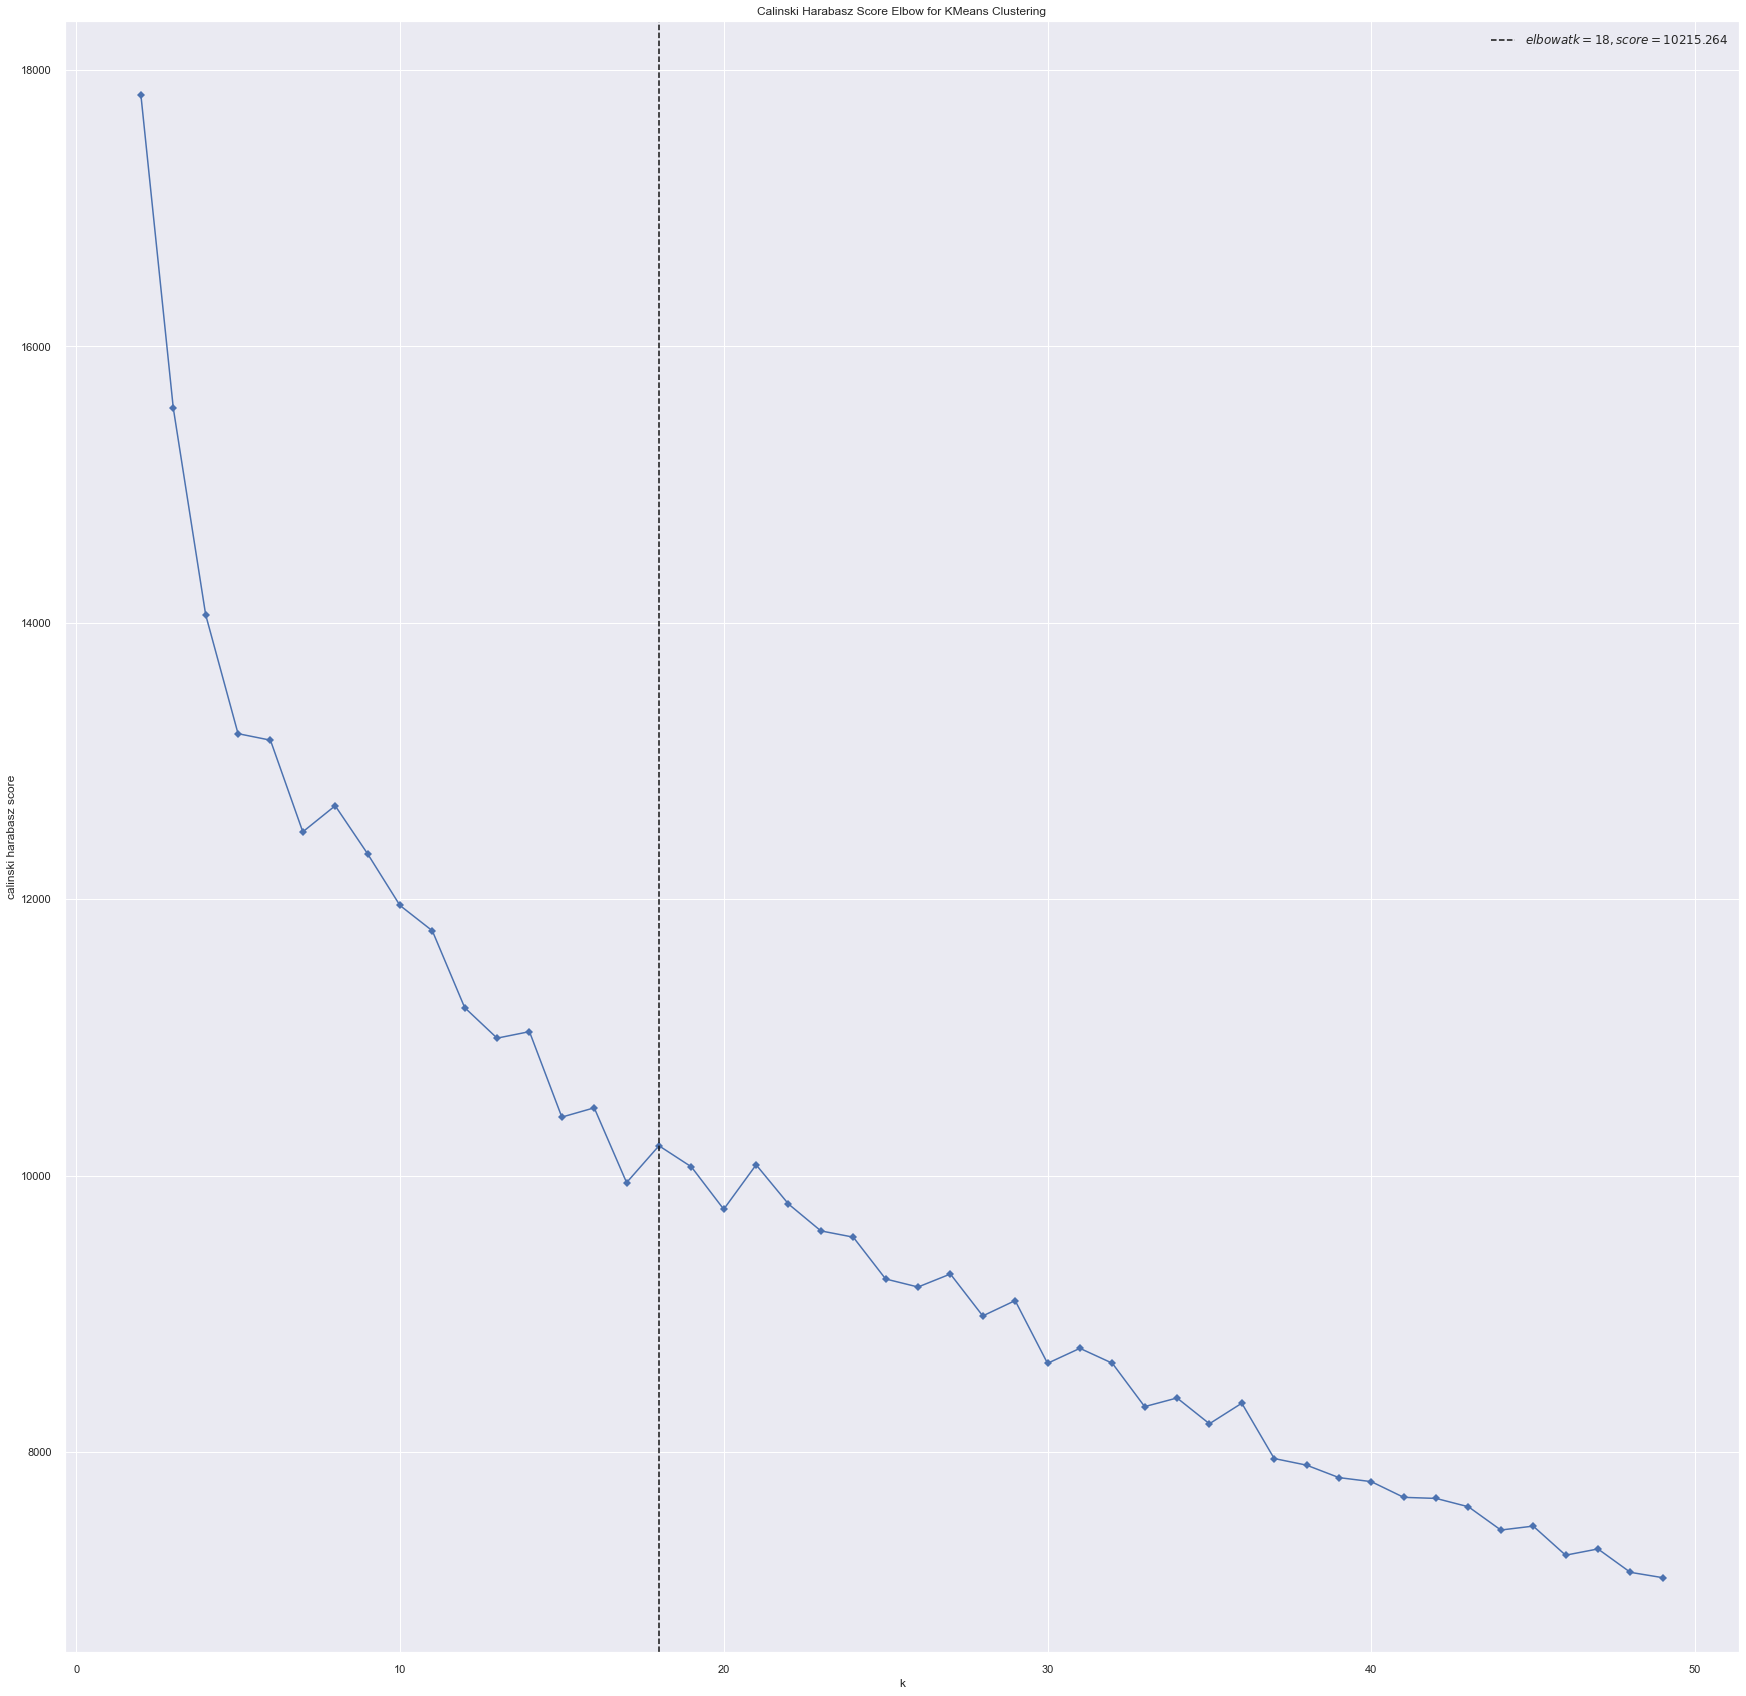

In [16]:
#First I will look for clusters using kmeans
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,50), metric = 'calinski_harabasz', timings=False)
#the Calinski harabasz metric is good for identifying optimal number of clusters when this is unknown
visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show() 

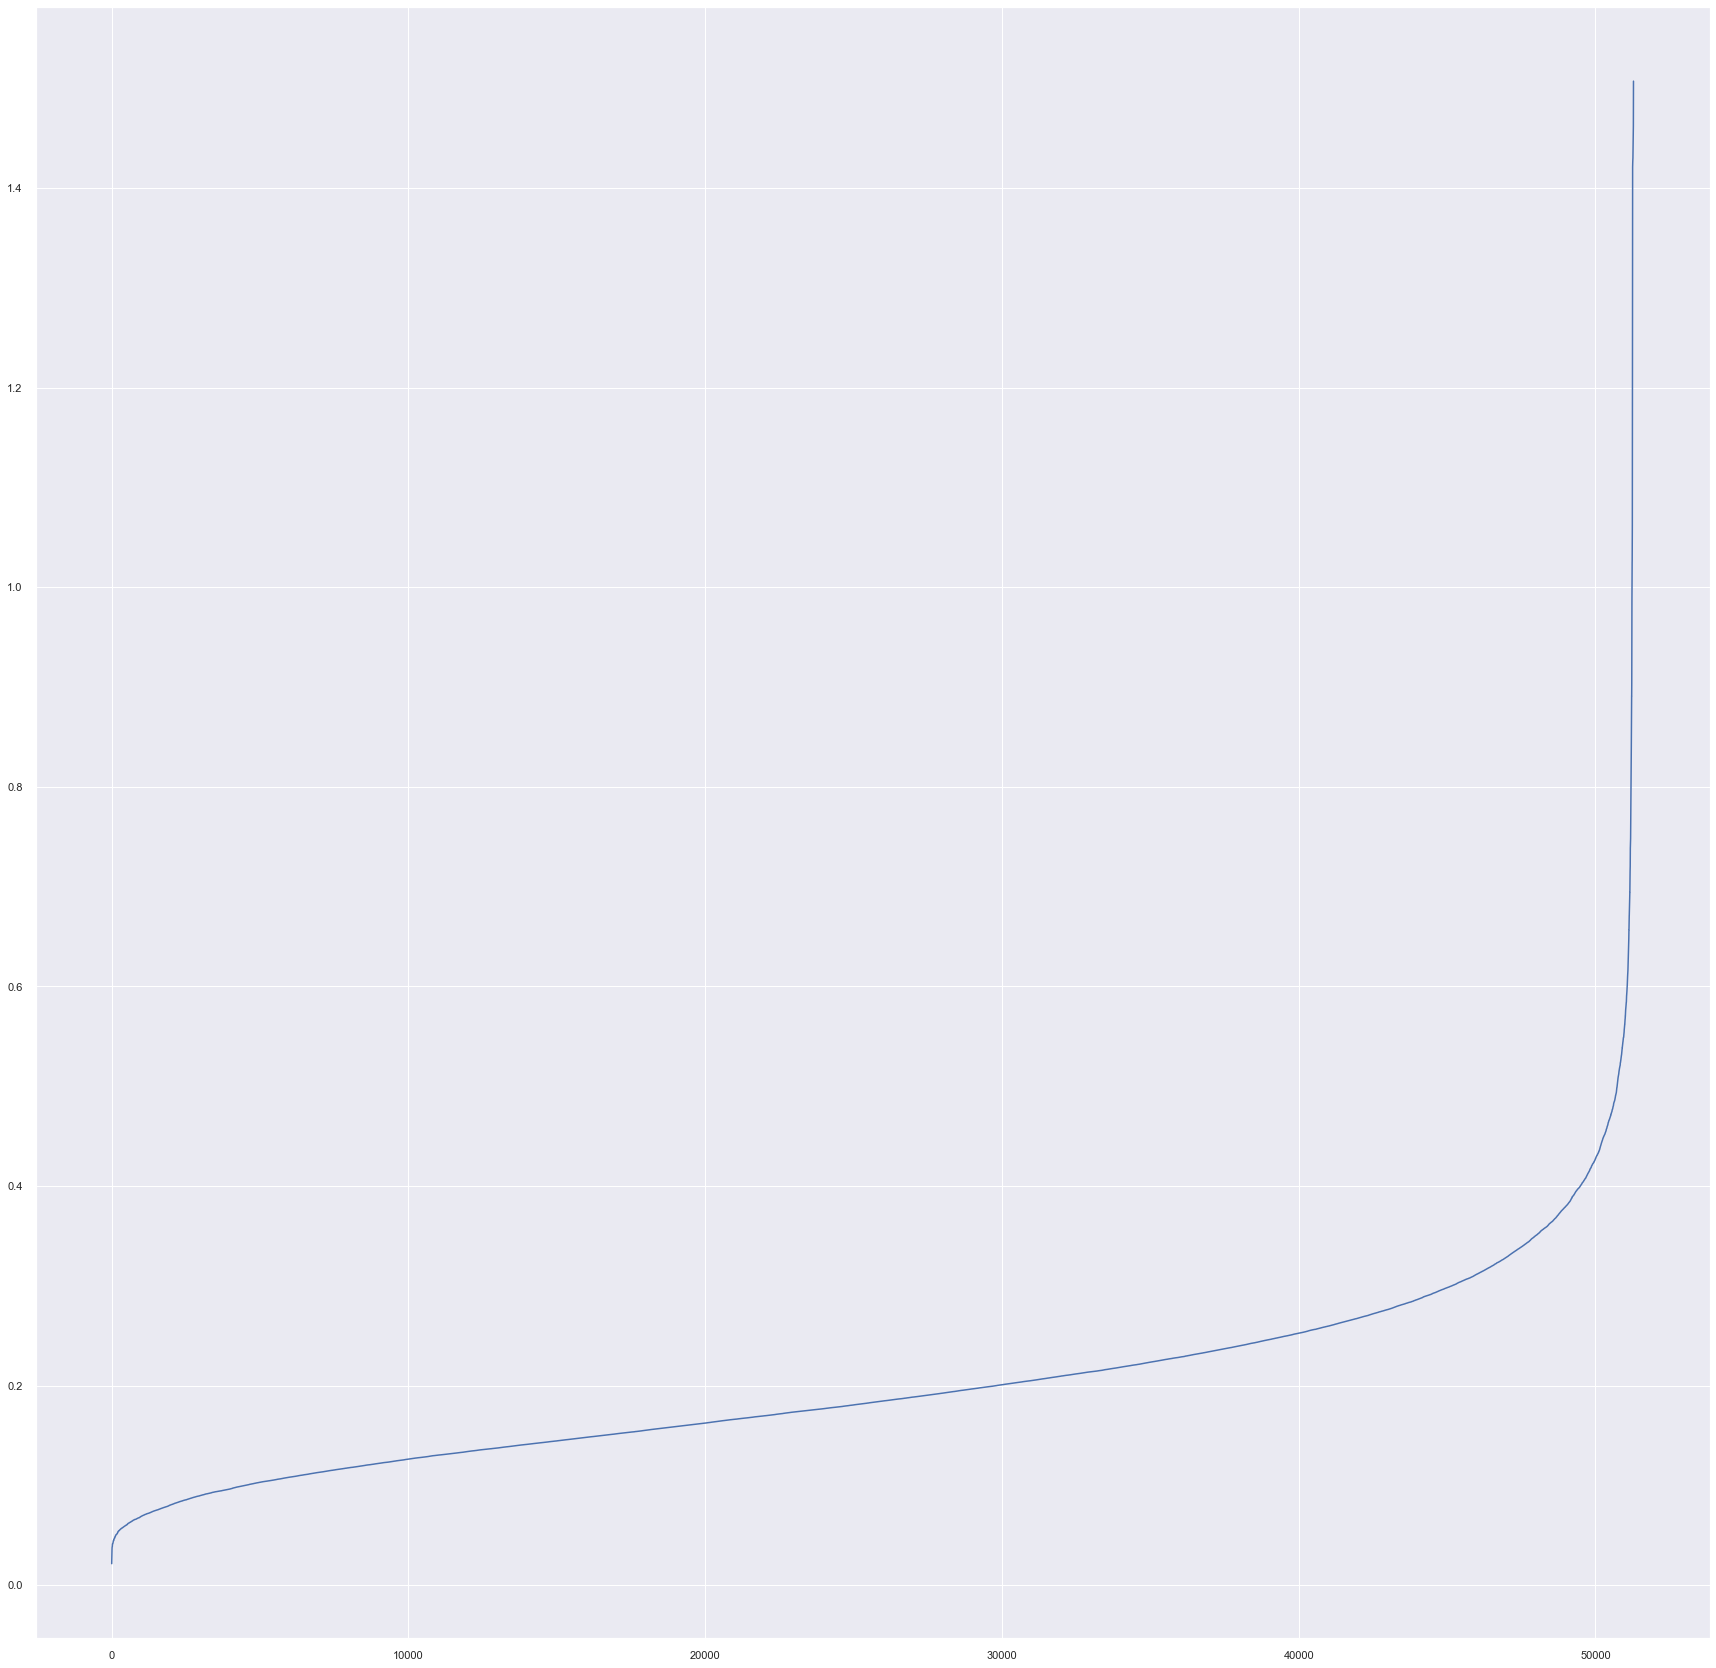

In [17]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [18]:
m = DBSCAN(eps=.3, min_samples=45*2, n_jobs=-1) #Eps is based on the graph above, min_samples is base on the rule of thumb minPts = 2·dim
m.fit(df_scaled)
core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
core_samples_mask[m.core_sample_indices_] = True
labels = m.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_scaled, labels))

Estimated number of clusters: 17
Estimated number of noise points: 18050
Silhouette Coefficient: 0.171


In [19]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

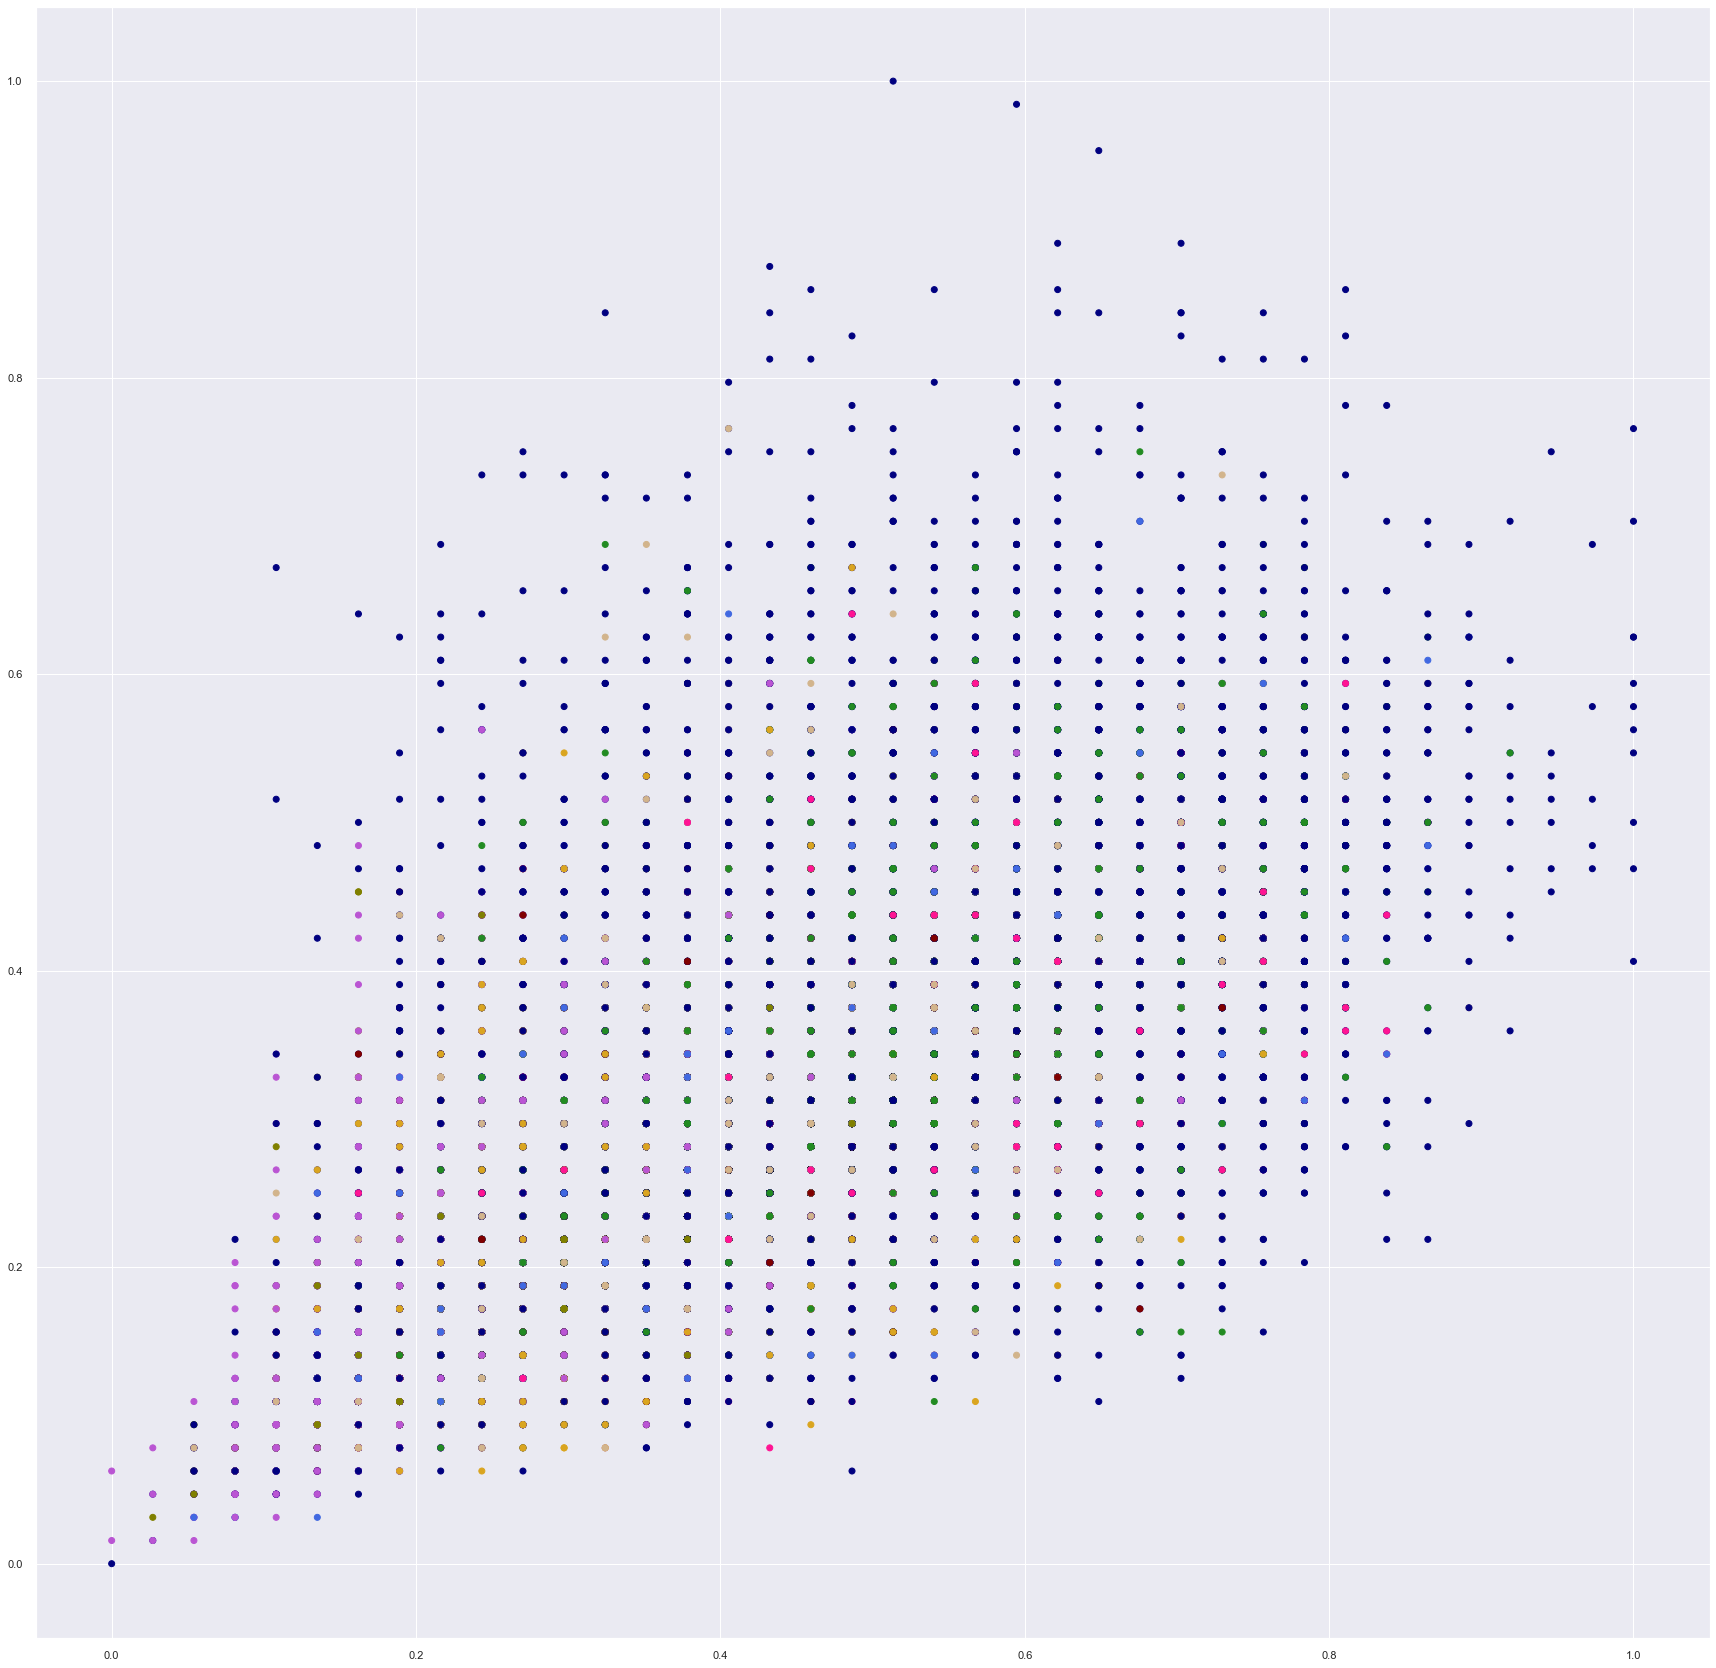

In [20]:
clusters = m.labels_
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=vectorizer(clusters))

Next I used PCA to identify the variables responsible for the majority of the variance in order to reduce the dimensionality of the dataset. I then proceeded with the DBSPAN clustering algorithm.

In [21]:
pca = PCA(n_components=.95)
principal_components = pca.fit_transform(df_scaled)
len(pca.components_)

16

In [22]:
principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)

(51285, 16)


In [23]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principal_df)
distances, indices = nbrs.kneighbors(principal_df)

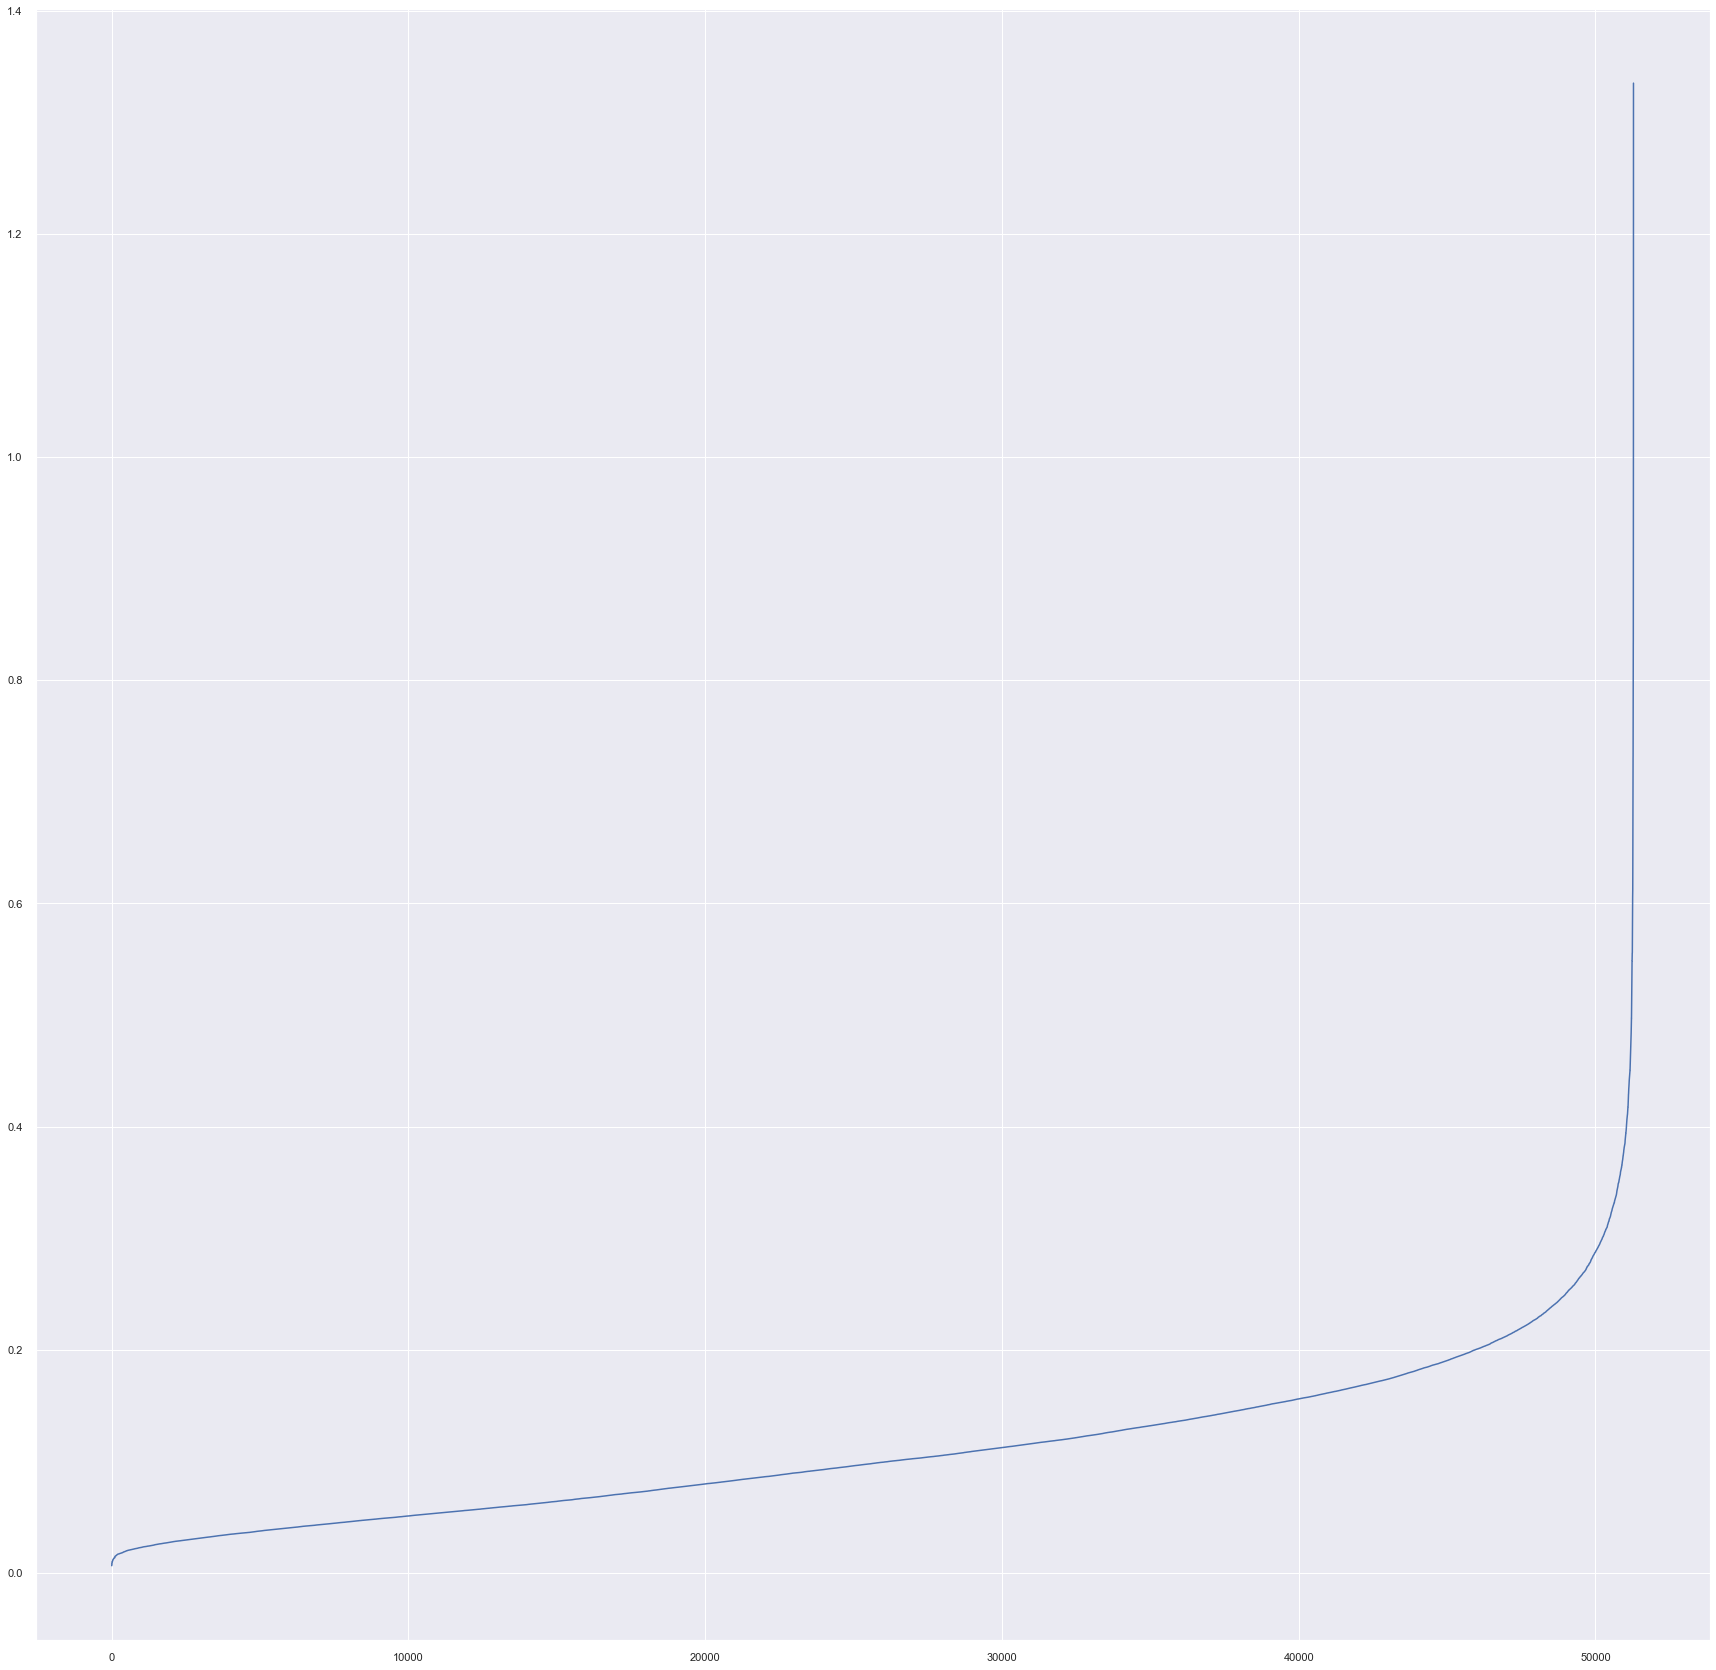

In [24]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [25]:
m = DBSCAN(eps=.25, min_samples=16*2, n_jobs=-1) #based on the elbow in the plot, eps is set at .25
m.fit(principal_df)

DBSCAN(eps=0.25, min_samples=32, n_jobs=-1)

In [26]:
core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
core_samples_mask[m.core_sample_indices_] = True
labels = m.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(principal_df, labels)) #https://medium.com/@shritam/how-dbscan-algorithm-works-2b5bef80fb3

Estimated number of clusters: 37
Estimated number of noise points: 8618
Silhouette Coefficient: 0.337


The silhouette coeeficient improved with PCA feature selection and the number of clusters remained the same. 

In [27]:
clusters = m.labels_

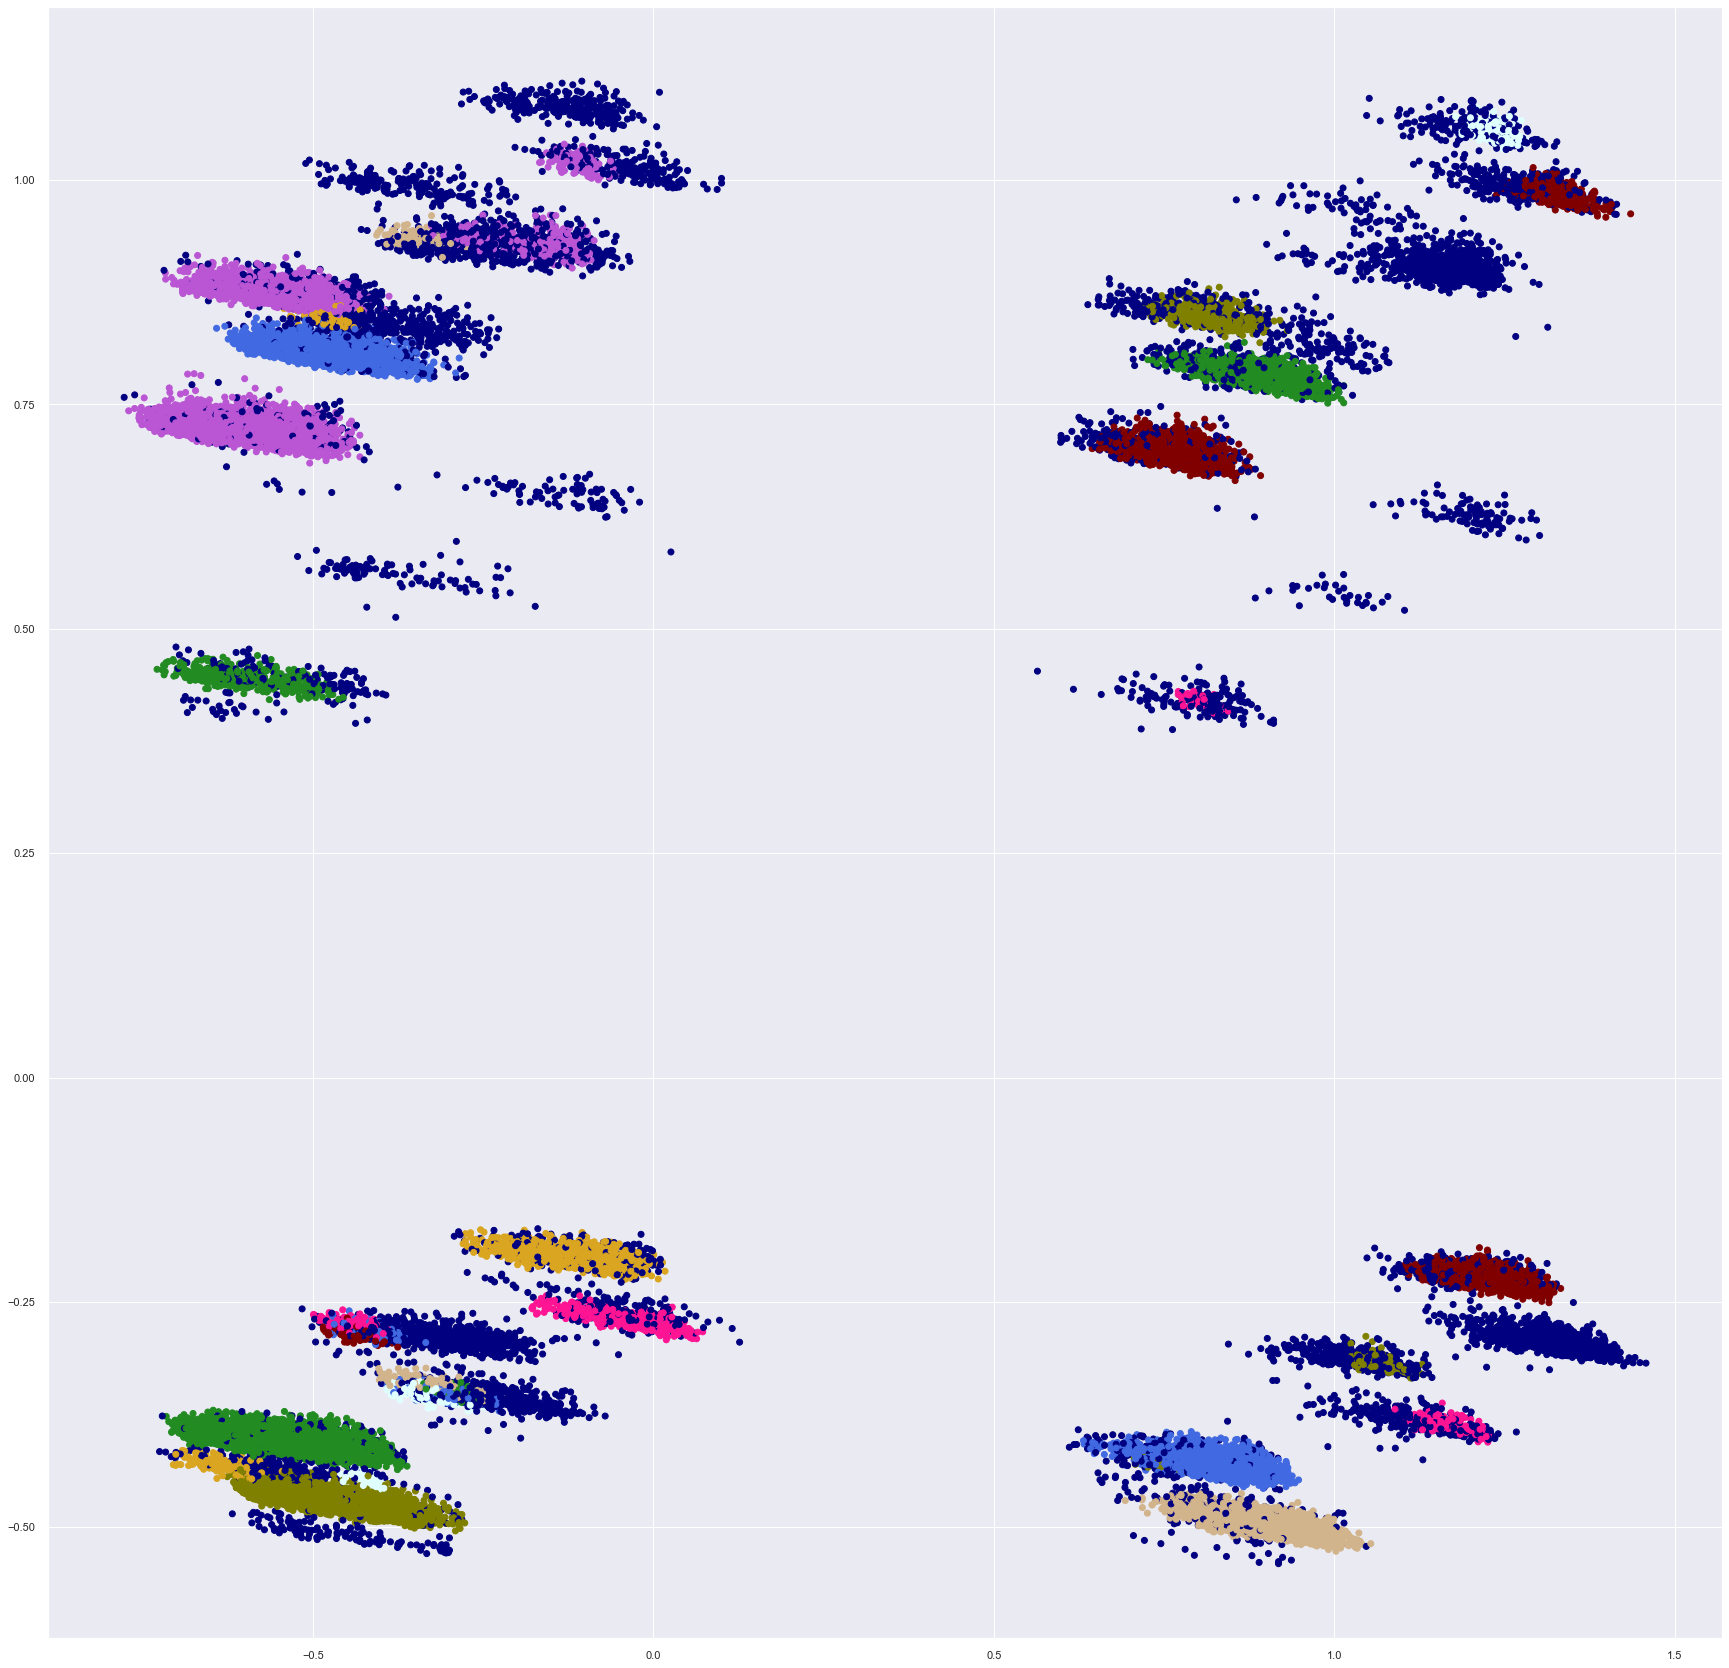

In [28]:
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=vectorizer(clusters))

In [29]:
#Finally, I want to identify some of the characteristics of my clusters:
clusters = m.fit_predict(principal_df)
df2['cluster'] = clusters

In [30]:
clusters_grouped = df2.groupby(by = ['cluster']).median()
#I am only interested in when the clusters are different, so I will drop columns where all the data is the same
clusters_grouped.drop(clusters_grouped.std()[(clusters_grouped.std() == 0)].index, axis=1)


,Birth Place,Maternal Age,Maternal Nativity,Maternal Race,Marital Status,Maternal Education,Paternal Age,Paternal Education,"Prior births, now living",Interval since last Live Birth (Mo),Month prenatal care Began,Number of Prenatal Visits,BMI,Weight Gain,Number of Previous Cesareans,Delivery Method,Attendant at Birth,Gestation Duration (wks),Birth Weight (g)
cluster,,,,,,,,,,,,,,,,,,,
-1,1.0,30.0,1.0,2.0,1.0,4.0,33.0,4.0,1.0,74.0,3.0,10.0,26.50,27.0,0.0,2.0,1.0,39.0,3260.0
0,1.0,30.0,1.0,1.0,1.0,6.0,32.0,5.0,0.0,888.0,2.0,12.0,26.40,32.0,0.0,3.0,1.0,39.0,3394.5
1,1.0,27.0,1.0,2.0,2.0,3.0,29.0,3.0,1.0,42.0,3.0,11.0,27.30,26.0,0.0,1.0,1.0,39.0,3147.0
2,1.0,31.0,1.0,1.0,1.0,5.0,33.0,4.0,1.0,33.0,3.0,12.0,25.10,29.0,0.0,1.0,1.0,39.0,3426.0
3,1.0,32.0,1.0,1.0,1.0,5.0,34.0,4.0,1.0,37.0,2.0,12.0,27.50,29.0,1.0,4.0,1.0,39.0,3405.0
4,1.0,22.0,1.0,1.0,2.0,3.0,24.0,3.0,0.0,888.0,3.0,12.0,24.50,32.0,0.0,1.0,1.0,39.0,3232.0
5,1.0,28.0,1.0,2.0,1.0,6.0,30.0,5.0,0.0,888.0,2.0,12.0,25.20,31.0,0.0,1.0,1.0,39.0,3175.0
6,1.0,29.0,1.0,1.0,1.0,6.0,30.0,5.0,0.0,888.0,2.0,12.0,24.30,31.0,0.0,1.0,1.0,39.0,3330.0
7,1.0,34.0,2.0,4.0,1.0,6.0,36.0,7.0,1.0,58.0,2.0,12.0,25.20,24.0,1.0,4.0,1.0,39.0,3203.0


In the above table, the noisy data is given the -1 cluster value while the 4 clusters are shown iwht 0-3.

In [31]:
pd.set_option('display.max_rows', df2.shape[0]+1)

In [32]:
clusters_grouped = df2.groupby(by = ['cluster']).mean()
#I am only interested in when the clusters are different, so I will drop columns where all the data is the same
clusters_grouped.drop(clusters_grouped.std()[(clusters_grouped.std() == 0)].index, axis=1).T

cluster,-1,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
Birth Place,1.128568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.615819,2.780952,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Maternal Age,30.528545,30.182551,27.382697,30.883426,32.027263,23.195804,27.808260,28.708191,33.549451,27.900826,...,32.977401,28.028571,28.878788,31.567308,33.370787,30.762712,31.421053,22.066667,30.735294,26.531250
Maternal Nativity,1.373985,1.134898,1.100546,1.165109,1.181001,1.138112,1.312684,1.129627,1.978022,1.074380,...,1.045198,1.009524,1.863636,1.701923,1.820225,1.152542,1.294737,1.177778,1.264706,1.281250
Maternal Residence Status,1.343119,1.413455,1.247077,1.400163,1.422147,1.349068,1.353982,1.404935,1.252747,1.173554,...,1.197740,1.276190,1.287879,1.375000,1.325843,1.338983,1.557895,1.266667,1.294118,1.312500
Maternal Race,4.411348,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,...,1.000000,1.000000,10.000000,7.846154,5.000000,15.000000,2.000000,1.000000,1.000000,1.000000
Marital Status,1.415061,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
Maternal Education,4.193200,5.489839,3.477786,4.866461,4.933952,3.568765,5.256637,5.434666,6.494505,3.289256,...,6.045198,1.114286,6.257576,6.250000,6.730337,6.644068,6.357895,3.333333,3.147059,3.156250
Paternal Age,33.602924,32.044849,29.895557,33.105688,34.089095,25.804487,30.525074,30.670135,35.989011,29.826446,...,35.220339,29.276190,32.409091,33.586538,34.921348,32.508475,33.126316,24.200000,32.735294,29.062500
Paternal Education,4.426549,4.998598,3.237724,4.624422,4.597246,3.291958,4.902655,5.052624,6.637363,3.115702,...,6.118644,1.114286,6.575758,6.076923,7.056180,6.254237,6.115789,9.000000,2.735294,9.000000
"Prior births, now living",1.385588,0.000000,1.872954,1.771115,1.623946,0.000000,0.000000,0.000000,1.131868,1.867769,...,2.209040,2.971429,0.000000,0.000000,1.146067,0.000000,0.000000,0.000000,1.941176,1.750000


In [33]:
clusters_grouped = df2.groupby(by = ['cluster']).mean().sort_values('5 Minute APGAR', ascending = True)
#I am only interested in when the clusters are different, so I will drop columns where all the data is the same
clusters_grouped.drop(clusters_grouped.std()[(clusters_grouped.std() == 0)].index, axis=1).T

cluster,21,23,13,12,34,25,8,16,24,0,...,17,32,31,7,20,29,15,36,28,27
Birth Place,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,2.780952,2.615819
Maternal Age,23.567114,32.770000,31.682680,24.922735,22.066667,21.057143,27.900826,28.043478,30.741935,30.182551,...,31.216769,30.762712,33.370787,33.549451,34.6960,28.878788,33.206452,26.531250,28.028571,32.977401
Maternal Nativity,1.073826,1.386667,1.147914,1.150089,1.177778,1.050000,1.074380,1.193478,1.919355,1.134898,...,1.367076,1.152542,1.820225,1.978022,1.7520,1.863636,1.877419,1.281250,1.009524,1.045198
Maternal Residence Status,1.255034,1.356667,1.422882,1.361456,1.266667,1.242857,1.173554,1.345652,1.274194,1.413455,...,1.326176,1.338983,1.325843,1.252747,1.3040,1.287879,1.270968,1.312500,1.276190,1.197740
Maternal Race,2.000000,2.000000,1.000000,1.000000,1.000000,15.000000,2.000000,1.000000,4.000000,1.000000,...,2.000000,15.000000,5.000000,4.000000,7.5200,10.000000,4.000000,1.000000,1.000000,1.000000
Marital Status,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,2.000000,1.000000,1.000000
Maternal Education,3.395973,4.543333,4.979772,3.677620,3.333333,3.242857,3.289256,3.415217,6.685484,5.489839,...,4.392638,6.644068,6.730337,6.494505,6.3280,6.257576,6.690323,3.156250,1.114286,6.045198
Paternal Age,25.647651,35.420000,33.680152,27.423623,24.200000,23.692857,29.826446,29.865217,33.459677,32.044849,...,34.596115,32.508475,34.921348,35.989011,36.2400,32.409091,36.380645,29.062500,29.276190,35.220339
Paternal Education,3.177852,4.276667,4.613148,3.362345,9.000000,3.042857,3.115702,3.108696,6.620968,4.998598,...,4.246421,6.254237,7.056180,6.637363,6.1920,6.575758,6.761290,9.000000,1.114286,6.118644
"Prior births, now living",0.000000,1.820000,1.606195,0.000000,0.000000,0.000000,1.867769,1.656522,0.000000,0.000000,...,2.042945,0.000000,1.146067,1.131868,1.4160,0.000000,1.193548,1.750000,2.971429,2.209040


In [34]:
(clusters_grouped.var(),clusters_grouped.std())

(Birth Place                                 0.147896
 Maternal Age                               12.213448
 Maternal Nativity                           0.095739
 Maternal Residence Status                   0.006115
 Maternal Race                              16.231514
 Marital Status                              0.241054
 Maternal Education                          2.186851
 Paternal Age                               11.753457
 Paternal Education                          3.269812
 Prior births, now living                    0.843113
 Prior births, now dead                      0.000268
 Prior terminations                          0.026864
 Interval since last Live Birth (Mo)    173179.025268
 Month prenatal care Began                   0.318157
 Number of Prenatal Visits                   0.796886
 Daily Cigarette use, 3rd Trimester          0.186322
 BMI                                         6.818436
 Weight Gain                                10.307891
 Number of Previous Cesarean

## Conclusions:
After dimensionality reduction, there appear to be 37 clusters in the data. Upon closer analysis of the differences between those clusters, I found that the greatest variance was among the parental age, interval since last birth, birth weight, and maternal race. There was little variance between groups on the 5 Minute ApGAR score, which I was initially using as a metric for outcome, but which clearly is not being picked up as a difference between groups. Upon revision of the project, the data produced a lot more clusters, which made for a more complicated story to interpret as well. This will require a significant amount additional analysis to interpret.
Additional analysis may be required to tease out the nuances of the groups and discover additional targets for intervention.

Using this project I was able to gain experience applying a clustering algorithm as well as working with a larger, more complex dataset than I am used to. I was able to gain a better understanding of PCA and how to apply it practically, as well as what DBSCAN is, when it is best applied, and how to determine the values for each of the parameters. I feel that I have gained a lot through this project in terms of experience and practice. 

In [35]:
end_time = time.time()

print('Runtime: '+ str((end_time - start_time)/60) + ' minutes')

Runtime: 7.048194392522176 minutes
